In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby("area_type")["area_type"].agg("count") #counting total samples of area_type

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(["area_type", "availability", "society"],axis="columns")
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df2.isnull().sum() #no of rows of particular column where data is na

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df3=df2.dropna()

In [8]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [9]:
df3.shape

(12710, 6)

In [10]:
df3["size"].unique()# gives all unique value

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [11]:
df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))#applying a function to remove bedroom, bhk etc

C:\Users\Puskal\AppData\Local\Temp\ipykernel_3876\1646728615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))#applying a function to remove bedroom, bhk etc


In [12]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [13]:
df3["bhk"].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [14]:
df3[df3.bhk>20] #data of house where bhk>20

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [15]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def isfloat(x):
    try:
        float(x)
        
    except:
        return False
    return True

In [17]:
df3[~df3["total_sqft"].apply(isfloat)].head(10)#returns values which are not float type i.e. data in a range or other unit

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [18]:
def range_to_mean(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return ((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [19]:
df3["total_sqft"]=df3["total_sqft"].apply(range_to_mean)

C:\Users\Puskal\AppData\Local\Temp\ipykernel_3876\367311907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["total_sqft"]=df3["total_sqft"].apply(range_to_mean)


In [20]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [21]:
df3.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
balcony           0.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [22]:
df4=df3.copy()

In [23]:
df4.isnull().sum()

location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [24]:
df4.shape

(12710, 7)

In [25]:
df4=df4.dropna()

In [26]:
df4.shape

(12668, 7)

In [27]:
df4["price_per_sqft"]=df4.price*100000/df4.total_sqft

In [28]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [29]:
len(df4.location.unique()) #total no of unique rows in location

1259

In [30]:
location_stats= df4.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [31]:
location_stats

location
Whitefield              513
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          259
Thanisandra             230
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1259, dtype: int64

In [32]:
Location_stats_lessthan10=location_stats[location_stats<10]

In [33]:
Location_stats_lessthan10

location
Chennammana Kere        9
Nagadevanahalli         9
Chandra Layout          9
Kaverappa Layout        9
Peenya                  9
                       ..
Kalhalli                1
Kalkere Channasandra    1
 Banaswadi              1
Kamdhenu Nagar          1
whitefiled              1
Name: location, Length: 1012, dtype: int64

In [34]:
df4.location= df4.location.apply(lambda x: "other" if x in Location_stats_lessthan10 else x)

In [35]:
len(df4.location.unique())

248

In [36]:
df4["sqft_per_bhk"]=df4.total_sqft/df4.bhk

In [37]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606,528.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615,650.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556,480.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861,507.0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000,600.0


In [38]:
df4.price_per_sqft.describe()

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

In [39]:
#Outlier removal using IQR
Q1=df4.sqft_per_bhk.quantile(0.25)
Q3=df4.sqft_per_bhk.quantile(0.75)
Q1,Q3

(473.3333333333333, 622.5)

In [40]:
IQR=Q3-Q1
IQR

149.16666666666669

In [41]:
lowerlimit= Q1-(1.5*IQR)
upperlimit=Q3+(1.5*IQR)
lowerlimit, upperlimit

(249.5833333333333, 846.25)

In [42]:
df5=df4[(df4.sqft_per_bhk>lowerlimit)&(df4.sqft_per_bhk<upperlimit)]

In [43]:
df5.shape

(11467, 9)

In [44]:
def remove_pricepersqft_outlier(df):
    df_out=pd.DataFrame()
    for i, j in df.groupby("location"):
        m=np.mean(j.price_per_sqft)
        sd=np.std(j.price_per_sqft)
        newdf=j[(j.price_per_sqft>(m-sd)) & (j.price_per_sqft<(m+sd))]
        df_out=pd.concat([df_out, newdf], ignore_index=True)
    return df_out


df6=remove_pricepersqft_outlier(df5)
df6.head()


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bhk
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.0,3,3520.000000,416.666667
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000,625.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667,600.000000
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419,585.000000
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509,475.000000


In [45]:
df6.shape

(9381, 9)

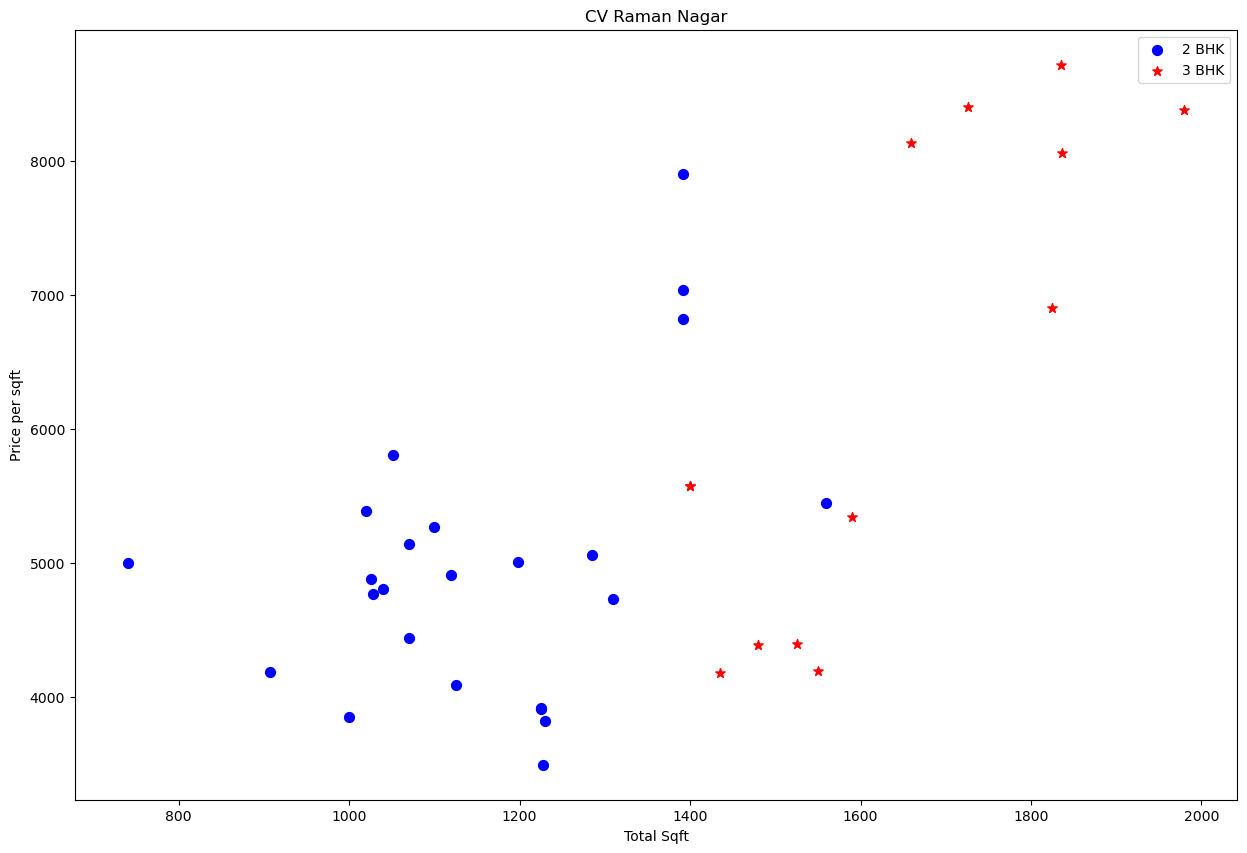

In [46]:
#in some areas price of 2bhk is more than 3bhk
#scatter plot to  show such data
def plot_scatter(df, location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, color='red',marker='*', label='3 BHK', s=50)
    plt.xlabel("Total Sqft")
    plt.ylabel("Price per sqft")
    plt.title(location)
    plt.legend()
    
plot_scatter(df6, 'CV Raman Nagar')

In [47]:
df6.location.unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basapura', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny P

In [48]:
df6.bath.unique()


array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 27., 13.])

Text(0, 0.5, 'Total sqft')

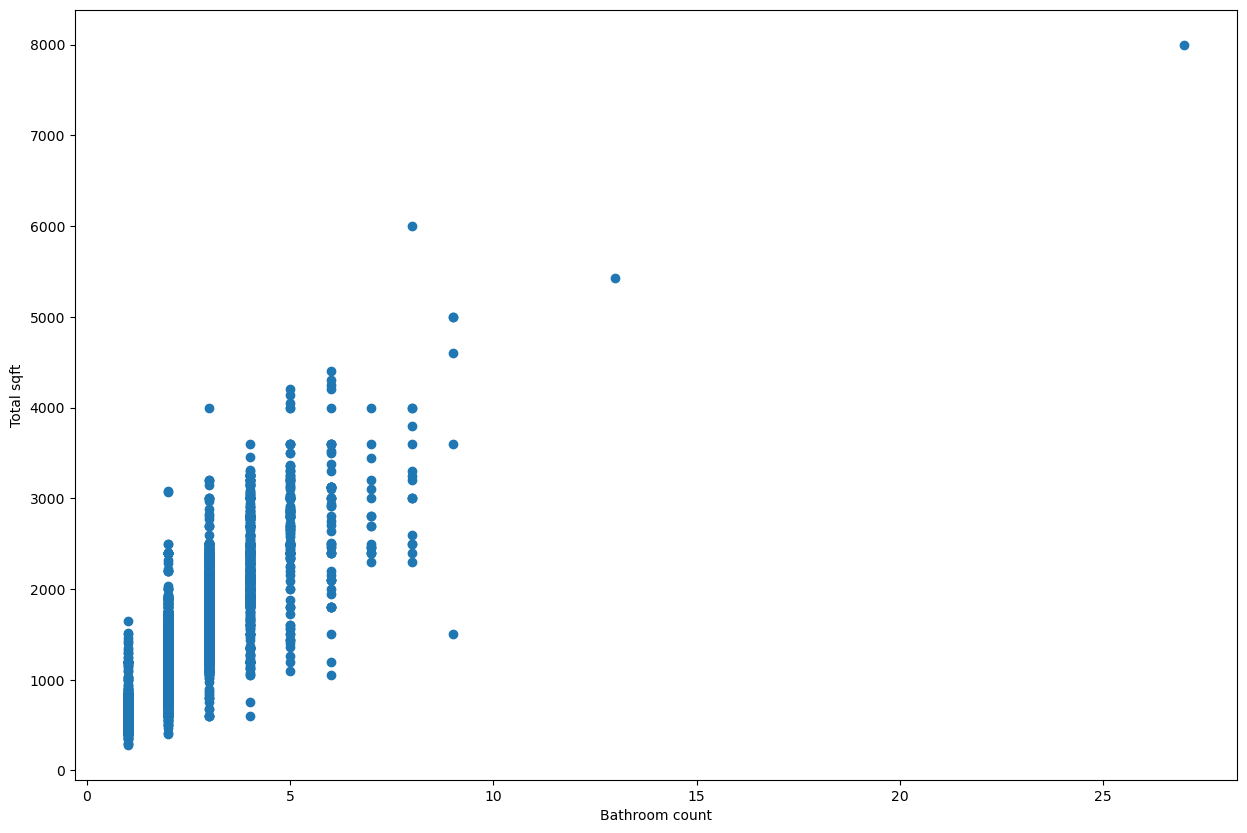

In [49]:
#Scatter plot of no of  bathroom vs total_sqft area
plt.scatter(df6.bath, df6.total_sqft)
plt.xlabel("Bathroom count")
plt.ylabel("Total sqft")


In [50]:
df6.bath.max()

27.0

In [51]:
df7=df6.drop(["size"], axis=1)
df7

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bhk
0,Devarachikkanahalli,1250.0,2.0,3.0,44.00,3,3520.000000,416.666667
1,Devarachikkanahalli,1250.0,2.0,2.0,40.00,2,3200.000000,625.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.00,2,6916.666667,600.000000
3,Devarachikkanahalli,1170.0,2.0,2.0,40.00,2,3418.803419,585.000000
4,Devarachikkanahalli,1425.0,2.0,2.0,65.00,3,4561.403509,475.000000
...,...,...,...,...,...,...,...,...
9376,other,1256.0,2.0,1.0,65.00,2,5175.159236,628.000000
9377,other,1353.0,2.0,2.0,110.00,2,8130.081301,676.500000
9378,other,812.0,1.0,0.0,26.00,1,3201.970443,812.000000
9379,other,1440.0,2.0,2.0,63.93,3,4439.583333,480.000000


In [52]:
#from general konowledge a house no matter how big should not contain more than 6 bathrooms as bathrooms occupy area so living area will be less

In [53]:
df8=df7[(df7.bath<=6)]
df8.shape

(9340, 8)

Text(0, 0.5, 'Total sqft')

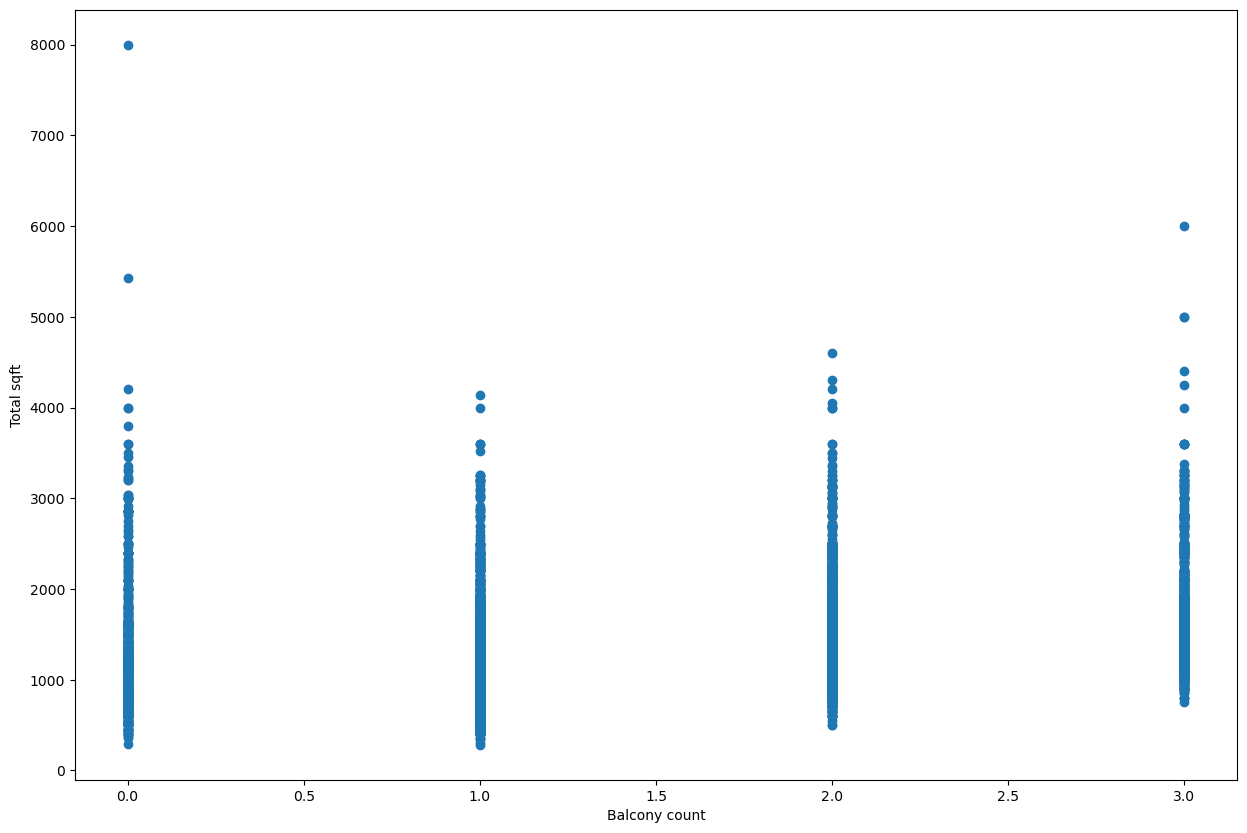

In [54]:
#Scatter plot of no of  balcony vs total_sqft area
plt.scatter(df6.balcony, df6.total_sqft)
plt.xlabel("Balcony count")
plt.ylabel("Total sqft")

In [55]:
#Balcony does not play an important role in house prediction
df9=df8.drop('balcony',axis=1)
df9.shape

(9340, 7)

In [56]:
#location column is categorical
dummies=pd.get_dummies(df9.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df10=pd.concat([df9, dummies.drop('other', axis=1)], axis=1)
df10

,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,44.00,3,3520.000000,416.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1250.0,2.0,40.00,2,3200.000000,625.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.00,2,6916.666667,600.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.00,2,3418.803419,585.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.00,3,4561.403509,475.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9376,other,1256.0,2.0,65.00,2,5175.159236,628.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9377,other,1353.0,2.0,110.00,2,8130.081301,676.500000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9378,other,812.0,1.0,26.00,1,3201.970443,812.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9379,other,1440.0,2.0,63.93,3,4439.583333,480.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df11=df10.drop('location',  axis=1)


In [59]:
df11

,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,44.00,3,3520.000000,416.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,40.00,2,3200.000000,625.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.00,2,6916.666667,600.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.00,2,3418.803419,585.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.00,3,4561.403509,475.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9376,1256.0,2.0,65.00,2,5175.159236,628.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9377,1353.0,2.0,110.00,2,8130.081301,676.500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9378,812.0,1.0,26.00,1,3201.970443,812.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9379,1440.0,2.0,63.93,3,4439.583333,480.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X=df11.drop('price', axis=1)

In [61]:
X.head()

,total_sqft,bath,bhk,price_per_sqft,sqft_per_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3,3520.000000,416.666667,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2,3200.000000,625.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,6916.666667,600.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,3418.803419,585.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,4561.403509,475.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y=df10['price']
y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=20)

In [64]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)


0.937200360960137

In [65]:
#Cross Validation Score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.9556235 , 0.94851132, 0.95121466, 0.94175882, 0.94176391])

In [66]:
def prediction(location, sqft, bath, bhk):
    index=np.where(X.columns==location)[0][0]
    
    a=np.zeros(len(X.columns))
    a[0]=sqft
    a[1]=bath
    a[2]=bhk

    if index>=0:
        a[index]=1
    return reg.predict([a])[0]

In [74]:
prediction('CV Raman Nagar', 1000, 3, 2)

C:\Users\Puskal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-13.605971090063534

In [69]:
prediction('1st Phase JP Nagar', 1500, 2, 3)

C:\Users\Puskal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


19.934836031857614

In [70]:
prediction('1st Phase JP Nagar', 1900, 2, 3)

C:\Users\Puskal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.10104049590073

In [71]:
prediction('1st Phase JP Nagar', 1500, 3, 3)

C:\Users\Puskal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.34842407033544

In [72]:
prediction('Indira Nagar', 3000, 3, 4)

C:\Users\Puskal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


122.77923627524841

In [75]:
import pickle

In [76]:
pickle_out=open("bapp.pkl","wb")
pickle.dump(reg,pickle_out)
pickle_out.close()

In [77]:
import json 
columns={'data_columns':[col.lower() for col in X.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))